In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pandas as pd

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

1. Linear regression

In [2]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [3]:
X = np.array([0.5488135039273248,
 0.7151893663724195,
 0.6027633760716439,
 0.5448831829968969,
 0.4236547993389047,
 0.6458941130666561,
 0.4375872112626925,
 0.8917730007820798,
 0.9636627605010293,
 0.3834415188257777,
 0.7917250380826646,
 0.5288949197529045,
 0.5680445610939323,
 0.925596638292661,
 0.07103605819788694,
 0.08712929970154071,
 0.02021839744032572,
 0.832619845547938,
 0.7781567509498505,
 0.8700121482468192,
 0.978618342232764,
 0.7991585642167236,
 0.46147936225293185,
 0.7805291762864555,
 0.11827442586893322,
 0.6399210213275238,
 0.1433532874090464,
 0.9446689170495839,
 0.5218483217500717,
 0.4146619399905236,
 0.26455561210462697,
 0.7742336894342167,
 0.45615033221654855,
 0.5684339488686485,
 0.018789800436355142,
 0.6176354970758771,
 0.6120957227224214,
 0.6169339968747569,
 0.9437480785146242,
 0.6818202991034834,
 0.359507900573786,
 0.43703195379934145,
 0.6976311959272649,
 0.06022547162926983,
 0.6667667154456677,
 0.6706378696181594,
 0.2103825610738409,
 0.1289262976548533,
 0.31542835092418386,
 0.3637107709426226,
 0.5701967704178796,
 0.43860151346232035,
 0.9883738380592262,
 0.10204481074802807,
 0.2088767560948347,
 0.16130951788499626,
 0.6531083254653984,
 0.2532916025397821,
 0.4663107728563063,
 0.24442559200160274,
 0.15896958364551972,
 0.11037514116430513,
 0.6563295894652734,
 0.1381829513486138,
 0.1965823616800535,
 0.3687251706609641,
 0.8209932298479351,
 0.09710127579306127,
 0.8379449074988039,
 0.09609840789396307,
 0.9764594650133958,
 0.4686512016477016,
 0.9767610881903371,
 0.604845519745046,
 0.7392635793983017,
 0.039187792254320675,
 0.2828069625764096,
 0.1201965612131689,
 0.29614019752214493,
 0.11872771895424405,
 0.317983179393976,
 0.41426299451466997,
 0.06414749634878436,
 0.6924721193700198,
 0.5666014542065752,
 0.2653894909394454,
 0.5232480534666997,
 0.09394051075844168,
 0.5759464955561793,
 0.9292961975762141,
 0.31856895245132366,
 0.6674103799636817,
 0.13179786240439217,
 0.7163272041185655,
 0.2894060929472011,
 0.18319136200711683,
 0.5865129348100832,
 0.020107546187493552,
 0.8289400292173631,
 0.004695476192547066])

y = np.array([4.324257048578204,
 4.415576072309423,
 4.543484150337527,
 4.596838094108129,
 3.519717541536672,
 4.513839673617805,
 3.9048035650599164,
 5.247570908137112,
 5.114069914143706,
 4.103073567994318,
 4.8223004928656215,
 4.433093431729842,
 4.403612958599301,
 5.074226865733117,
 3.026905994296138,
 2.6578936399516064,
 2.9417583894321386,
 5.079132409279673,
 5.216205614704404,
 5.302568034818223,
 5.6611093065179325,
 4.898800074576873,
 4.34052172148202,
 4.985577728089004,
 2.7786783261649792,
 4.526156278110496,
 2.449253060536473,
 5.135581567823301,
 4.2257185027429,
 3.534063427182015,
 3.4116822653127223,
 4.751469769248416,
 3.503925060872096,
 4.003584172561976,
 2.62633431201033,
 4.443779252475804,
 4.410612417016843,
 4.5040028104814045,
 5.483347505545561,
 4.476879332744424,
 3.975070297572421,
 3.678657731445921,
 4.528758513047421,
 3.0725997699034817,
 4.806494135383089,
 4.715802192394844,
 2.731374570533824,
 3.3062615067092334,
 3.6605263523216633,
 4.089979319395734,
 3.860038615911632,
 4.183930597755175,
 5.127614448854053,
 2.9216939965279285,
 2.7504502511339455,
 3.3319367829772233,
 4.766643935121206,
 3.3289755462339397,
 3.8061156157949187,
 2.802443771459946,
 3.174337524081123,
 2.7846681061709844,
 4.691044367866168,
 3.2809311799744707,
 3.5652685900430465,
 3.9619788543755035,
 4.4746937737288075,
 2.651281891857548,
 5.2438252849204705,
 2.4599249009433297,
 5.450415001244316,
 3.460291593282358,
 5.130279789467411,
 3.8330583536957517,
 5.011488441552325,
 2.341488064823342,
 3.1937725684261316,
 3.288670977105098,
 3.5928349944899676,
 2.3880220863940402,
 3.118643694679841,
 3.864267385043773,
 2.7696710776505205,
 4.315309179484568,
 4.63401836054452,
 3.4101344287842323,
 4.105376963425058,
 2.871731508629896,
 4.457961516185307,
 5.099833588208243,
 3.353927919570063,
 4.212074888866167,
 2.5815865930935127,
 5.09335400233963,
 3.607769073890891,
 3.0400328946389177,
 3.9869534324035727,
 2.3146791203328734,
 4.544849247975965,
 2.448503054135762])

NameError: name 'np' is not defined

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)

NameError: name 'train_test_split' is not defined

In [5]:
# Graphic display
plt.scatter(X_train, y_train)
plt.show()

NameError: name 'plt' is not defined

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[1]),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

In [30]:
model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [52]:
history = model.fit(X_train,y_train,epochs=30)

Epoch 1/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0831 - mean_absolute_error: 0.2376 - mean_squared_error: 0.0831
Epoch 2/30
3/3 [==============================] - 0s 4ms/step - loss: 0.0800 - mean_absolute_error: 0.2408 - mean_squared_error: 0.0800
Epoch 3/30
3/3 [==============================] - 0s 4ms/step - loss: 0.0810 - mean_absolute_error: 0.2420 - mean_squared_error: 0.0810
Epoch 4/30
3/3 [==============================] - 0s 3ms/step - loss: 0.0788 - mean_absolute_error: 0.2358 - mean_squared_error: 0.0788
Epoch 5/30
3/3 [==============================] - 0s 4ms/step - loss: 0.0806 - mean_absolute_error: 0.2445 - mean_squared_error: 0.0806
Epoch 6/30
3/3 [==============================] - 0s 4ms/step - loss: 0.0820 - mean_absolute_error: 0.2487 - mean_squared_error: 0.0820
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 0.0885 - mean_absolute_error: 0.2549 - mean_squared_error: 0.0885
Epoch 8/30
3/3 [==============================] 

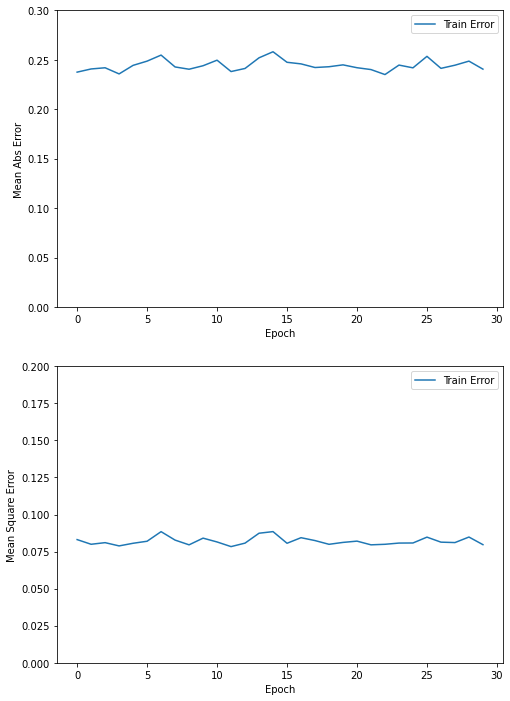

In [63]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.ylim([0,0.3])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.ylim([0,0.2])
  plt.legend()
  plt.show()

plot_history(history)

In [73]:
predictions = model.predict(X_test)

In [66]:
X_test.shape

(20,)

In [67]:
predictions.shape, predictions.flatten().shape

((20, 1), (20,))

In [68]:
len(X_test), len(predictions)

(20, 20)

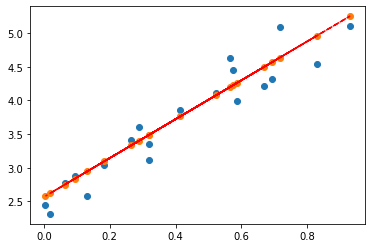

In [72]:
# Graphic display
plt.scatter(X_test, y_test)
plt.scatter(X_test, predictions)

z2 = np.polyfit(X_test, predictions.flatten(), 1)
p2 = np.poly1d(z2)
plt.plot(X_test,p2(X_test),"r--")

plt.show()

In [77]:
mean_absolute_error(y_test, predictions),  mean_squared_error(y_test, predictions),

(0.21539820632449813, 0.06599403356109836)

2. Fashion mnist

In [81]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [82]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [83]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [84]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

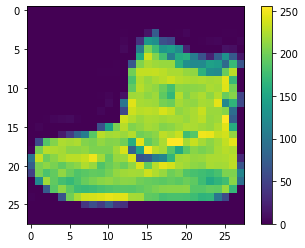

In [85]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [86]:
train_images = train_images / 255.0

test_images = test_images / 255.0

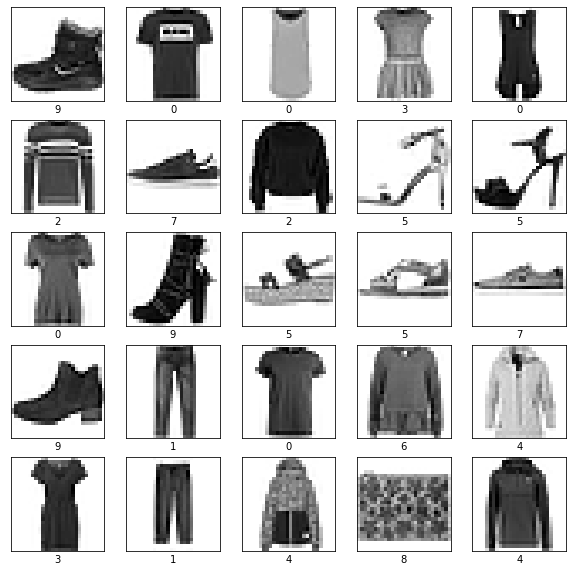

In [87]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [88]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

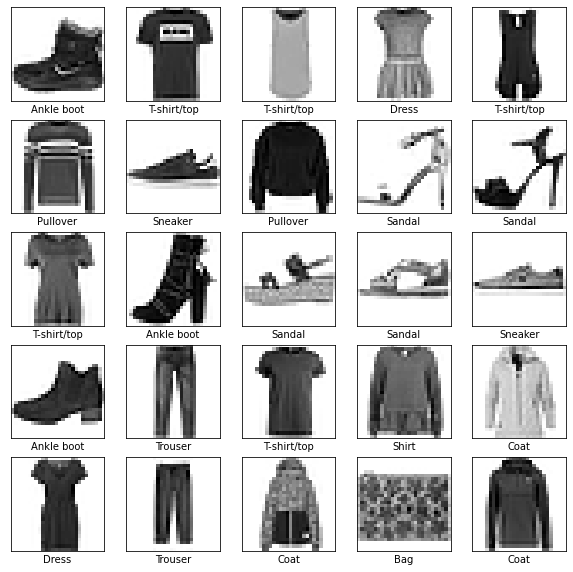

In [89]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

**모델구조를 바꿔가면서 실험해보세요**

In [78]:
# 실험
model = tf.keras.Sequential([
    
])

In [91]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5013 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3739 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3348 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3136 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2940 - accuracy: 0.8907


In [93]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3395 - accuracy: 0.8756
Test accuracy: 0.8755999803543091


In [94]:
predictions = model.predict(test_images)

In [95]:
predictions[0]

array([4.4781823e-06, 1.2370855e-06, 9.0870708e-07, 4.6111066e-07,
       5.1510813e-07, 3.8227785e-02, 2.3630973e-06, 2.1636166e-02,
       1.1799159e-05, 9.4011432e-01], dtype=float32)

In [96]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)

In [97]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted: {} (Labels: {})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

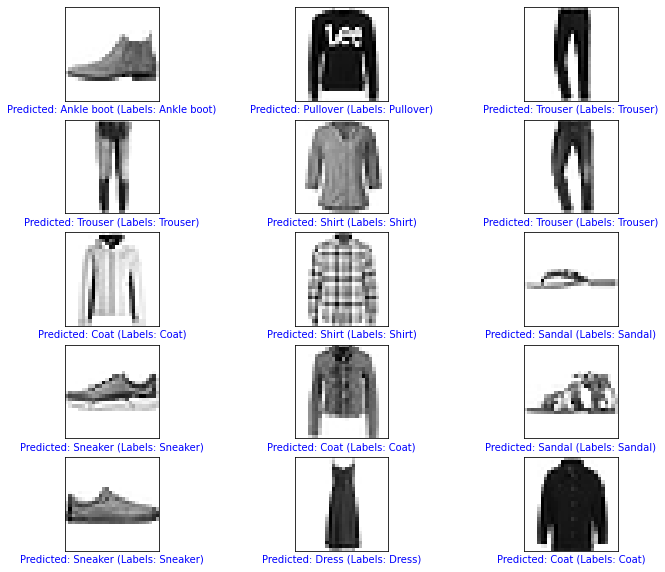

In [98]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  # plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # plot_value_array(i, predictions, test_labels)
plt.show()